In [1]:

import nifty5
import numpy as np
from importlib import reload

import sys
sys.path.append('..')
sys.path.append('../GlobalNewton')
from IPython.display import Math
import numpy as np
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
import re
import nifty5
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import bayesian_causal_model.bayesian_causal_sampling
import bayesian_causal_model.cause_model_shallow_nifty
import bayesian_causal_model.cause_model_shallow_numpy

#import bayesian_causal_model.effect_model_shallow
reload(bayesian_causal_model.bayesian_causal_model)
import global_newton
from benchmark_utils import get_pair

np.random.seed(23)



/afs/mpa/data/maxk/miniconda3/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/afs/mpa/data/maxk/miniconda3/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/afs/mpa/data/maxk/miniconda3/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Load and display a (difficult) case from the "Real World"- Cause-Effect-Pairs Benchmark
##### $x,y$ correspond to altitude and sunshine, respectively

1


/afs/mpa/home/maxk/source/NIFTy/.eggs/scipy-1.1.0-py3.6-linux-x86_64.egg/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


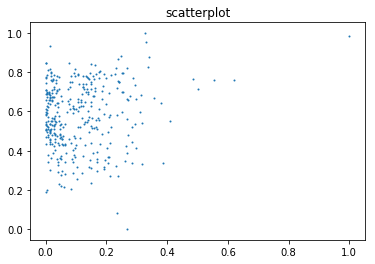

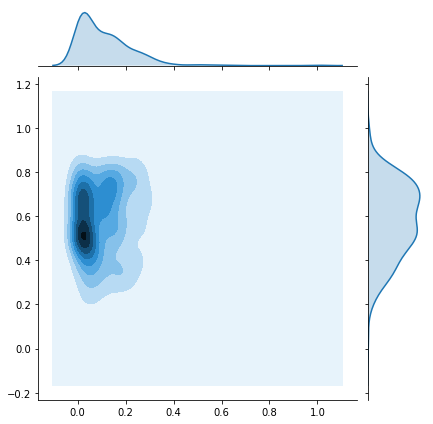

In [2]:

(x, y), direction = get_pair(3, 'tcep')
print(direction)
# scale both data samples to [0.25, 0.75] range
scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
x, y = scaler.fit_transform(np.array((x, y)).T).T
fig, ax= plt.subplots(1)
ax.scatter(x, y, s=1)
ax.set_title('scatterplot')
plot = sns.jointplot(x, y, kind="kde")

### Do inference with given Power Spectra $P_f$, $P_\beta$:
$P_f(q) = \frac{a_f}{(q/q_{0,f})^4+1}$

$P_\beta(q) = \frac{a_\beta}{(q/q_{0,\beta})^4+1}$

first, choose 
 
 $a_f = a_\beta = 1e6$ 
 
 $q_{0,\beta} = q_{0,f} = 1$

Evidence Hamiltonian for direction X->Y:  2665.074740389504
Contribution of terms:
ln(prod(k_j!))                : 156.43
1/2 ln(det(curvature_gamma_beta)): 2734.36
-k^dagger.beta_0              : -262.78
rho(One.e^beta_0)             : 349.63
1/2 beta_0.(B^-1).beta_0      : 17.46
1/2 y.((F_tilde + N)^-1).y    : 44.44
1/2 ln(det(F_tilde + N))      : -374.48

Evidence Hamiltonian for direction Y->X: 2770.970393418646
ln(prod(k_j!))                : 40.91
1/2 ln(det(curvature_gamma_beta)): 2738.58
-k^dagger.beta_0              : -15.51
rho(One.e^beta_0)             : 349.28
1/2 beta_0.(B^-1).beta_0      : 3.48
1/2 y.((F_tilde + N)^-1).y    : 18.61
1/2 ln(det(F_tilde + N))      : -364.38



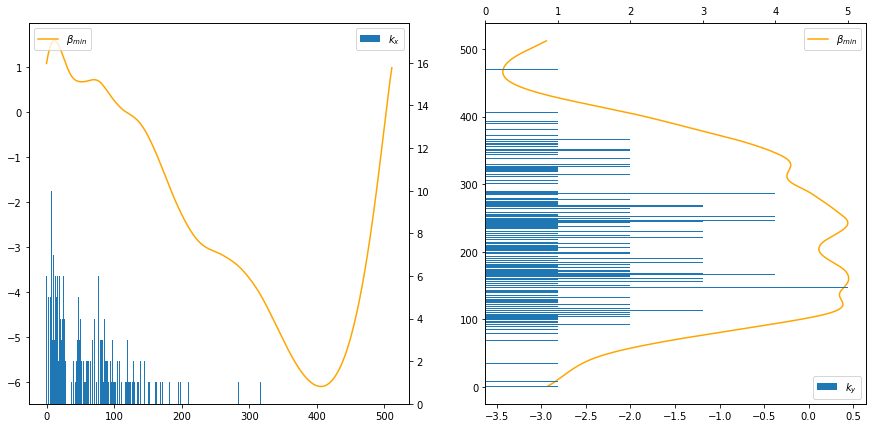

In [3]:
power_spectrum_beta = lambda q: 1e6/((q/1e0)**4+1)
power_spectrum_f = lambda q: 1e6/((q/1e0)**4 + 1)

bcm = bayesian_causal_model.cause_model_shallow_numpy.CausalModelShallow(
    N_pix=512,
    power_spectrum_beta=power_spectrum_beta,
    power_spectrum_f=power_spectrum_f,
    rho = 1e-0,
    noise_var=1e-1,
)

bcm.set_data(x, y)
evidence = bcm.get_evidence(direction=1, return_terms=1)
print('Evidence Hamiltonian for direction X->Y: ', evidence[0])
print('Contribution of terms:')
print(('{:<30}: {:.2f}\n'*7).format(*[t for term in evidence[1] for t in term ]))
beta0_x_to_y = bcm.minimization_result.x

evidence = bcm.get_evidence(direction=-1, return_terms=1)
print('Evidence Hamiltonian for direction Y->X:', evidence[0])
print(('{:<30}: {:.2f}\n'*7).format(*[t for term in evidence[1] for t in term ]))
beta0_y_to_x = bcm.minimization_result.x

fig = plt.figure(figsize=(15,7))
ax1, ax2  = fig.subplots(1, 2)
ax1_ = ax1.twinx()
ax1.ticklabel_format(axis='both', style='sci')
ax1.plot(beta0_x_to_y, label=r'$\beta_{min}$', c='orange')
ax1_.bar(np.arange(bcm.N_pix), bcm.k_x, label=r'$k_x$')
ax1.legend(loc=2)
ax1_.legend(loc=0)

ax2.plot(beta0_y_to_x, np.arange(bcm.N_pix, 0, -1), c='orange', label=r'$\beta_{min}$')
ax2_ = ax2.twiny()
ax2_.barh(np.arange(bcm.N_pix, 0, -1), bcm.k_y, label=r'$k_y$')
ax2.legend(loc=0)
ax2_.legend(loc=4)


### Vary scale parameters and amplitudes:
 
 $a_f = 1 = a_\beta = 1$ 
 
 $q_{0,\beta} = q_{0,f} = 10$

Evidence Hamiltonian for direction X->Y:  4807.304256313209
Contribution of terms:
ln(prod(k_j!))                : 156.43
1/2 ln(det(curvature_gamma_beta)): 3937.88
-k^dagger.beta_0              : -1.16
rho(One.e^beta_0)             : 511.68
1/2 beta_0.(B^-1).beta_0      : 0.74
1/2 y.((F_tilde + N)^-1).y    : 603.39
1/2 ln(det(F_tilde + N))      : -401.66

Evidence Hamiltonian for direction Y->X: 4133.300696847823
ln(prod(k_j!))                : 40.91
1/2 ln(det(curvature_gamma_beta)): 3937.88
-k^dagger.beta_0              : -0.13
rho(One.e^beta_0)             : 511.68
1/2 beta_0.(B^-1).beta_0      : 0.23
1/2 y.((F_tilde + N)^-1).y    : 44.39
1/2 ln(det(F_tilde + N))      : -401.65



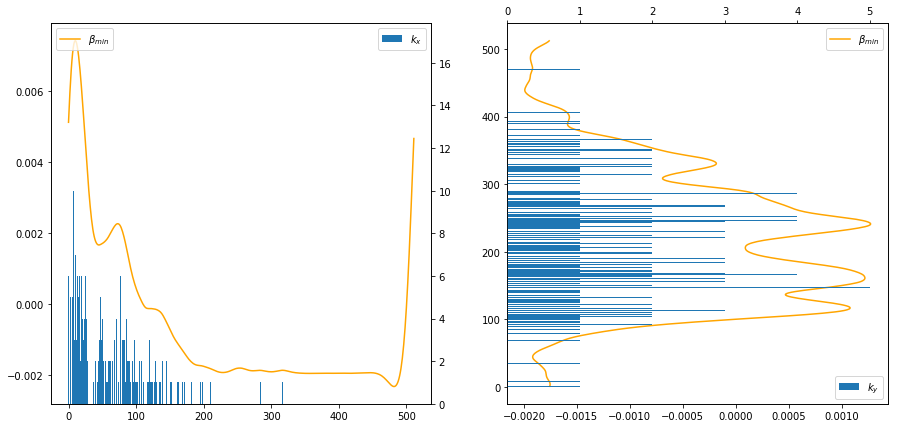

In [17]:
power_spectrum_beta = lambda q: 1/((q/1e1)**4+1)
power_spectrum_f = lambda q: 1/((q/1e1)**4 + 1)

bcm = bayesian_causal_model.cause_model_shallow_numpy.CausalModelShallow(
    N_pix=512,
    power_spectrum_beta=power_spectrum_beta,
    power_spectrum_f=power_spectrum_f,
    rho = 1e-0,
    noise_var=1e-1,
)

bcm.set_data(x, y)
evidence = bcm.get_evidence(direction=1, return_terms=1)
print('Evidence Hamiltonian for direction X->Y: ', evidence[0])
print('Contribution of terms:')
print(('{:<30}: {:.2f}\n'*7).format(*[t for term in evidence[1] for t in term ]))
beta0_x_to_y = bcm.minimization_result.x

evidence = bcm.get_evidence(direction=-1, return_terms=1)
print('Evidence Hamiltonian for direction Y->X:', evidence[0])
print(('{:<30}: {:.2f}\n'*7).format(*[t for term in evidence[1] for t in term ]))
beta0_y_to_x = bcm.minimization_result.x

fig = plt.figure(figsize=(15,7))
ax1, ax2  = fig.subplots(1, 2)
ax1_ = ax1.twinx()
ax1.ticklabel_format(axis='both', style='sci')
ax1.plot(beta0_x_to_y, label=r'$\beta_{min}$', c='orange')
ax1_.bar(np.arange(bcm.N_pix), bcm.k_x, label=r'$k_x$')
ax1.legend(loc=2)
ax1_.legend(loc=0)

ax2.plot(beta0_y_to_x, np.arange(bcm.N_pix, 0, -1), c='orange', label=r'$\beta_{min}$')
ax2_ = ax2.twiny()
ax2_.barh(np.arange(bcm.N_pix, 0, -1), bcm.k_y, label=r'$k_y$')
ax2.legend(loc=0)
ax2_.legend(loc=4)


### above, in both cases the inferred direction would be $Y->X$ (wrong)
### take another sample
##### x,y: weight and fuel consumption (in distance per fuel volume) of cars; ground truth: X->Y

1


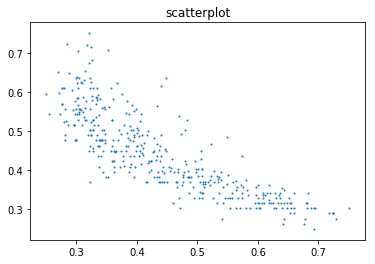

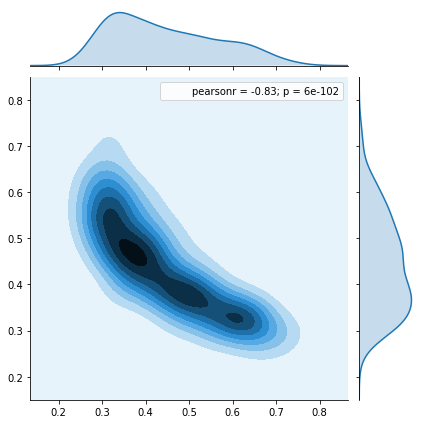

In [52]:
(x, y), direction = get_pair(14, 'tcep')
print(direction)
# scale both data samples to [0, 1] range
scaler = MinMaxScaler(feature_range=(0.25, 0.75))
#scaler = StandardScaler()
x, y = scaler.fit_transform(np.array((x, y)).T).T
fig, ax= plt.subplots(1)
ax.scatter(x, y, s=1)
ax.set_title('scatterplot')
plot = sns.jointplot(x, y, kind="kde")

### try same power spectra as before , first:
 
 $a_f = a_\beta = 1e6$ 
 
 $q_{0,\beta} = q_{0,f} = 1$

Iteration limit reached. Assuming convergence


Evidence Hamiltonian for direction X->Y:  497.880648450981
Contribution of terms:
1/2 ln(det(DB))               : 19.03
ln(prod(k_j!))                : 37.72
-k^dagger.beta_0              : -1.62
rho(One.e^beta_0)             : 826.78
1/2 beta_0.(B^-1).beta_0      : 3.92
1/2 y.((F_tilde + N)^-1).y    : 5.97
1/2 ln(det(F_tilde + N))      : -431.63



Iteration limit reached. Assuming convergence


Evidence Hamiltonian for direction Y->X: 1107.6041185186136
1/2 ln(det(DB))               : 19.04
ln(prod(k_j!))                : 346.85
-k^dagger.beta_0              : -10.25
rho(One.e^beta_0)             : 829.15
1/2 beta_0.(B^-1).beta_0      : 2.60
1/2 y.((F_tilde + N)^-1).y    : 5.61
1/2 ln(det(F_tilde + N))      : -432.22



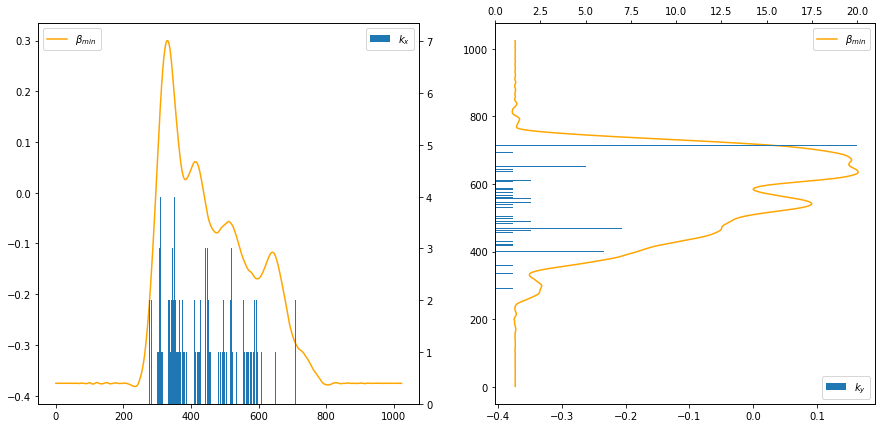

In [53]:
power_spectrum_beta = lambda q: 1e6/((q/1e0)**4+1)
power_spectrum_f = lambda q: 1e6/((q/1e0)**4 + 1)

minimizer = nifty5.VL_BFGS(controller=nifty5.GradientNormController(
    iteration_limit=2000, name=None))
bcm = bayesian_causal_model.cause_model_shallow.CausalModelCauseShallow(
    N_pix=1024,
    power_spectrum_beta=power_spectrum_beta,
    power_spectrum_f=power_spectrum_f,
    minimizer=minimizer,
    rho = 1e-0,
    noise_var=1e-1,
)

beta_init = nifty5.Field.from_global_data(domain=bcm.s_space, arr=np.zeros(1024))

bcm.set_data(x, y)
evidence = bcm.get_evidence(direction=1, return_terms=1, beta_init=beta_init)
print('Evidence Hamiltonian for direction X->Y: ', evidence[0])
print('Contribution of terms:')
print(('{:<30}: {:.2f}\n'*7).format(*[t for term in evidence[1] for t in term ]))
emin_cause_direction_1 = bcm.energy_cause_min.position.to_global_data()

evidence = bcm.get_evidence(direction=-1, return_terms=1, beta_init=beta_init)
print('Evidence Hamiltonian for direction Y->X:', evidence[0])
print(('{:<30}: {:.2f}\n'*7).format(*[t for term in evidence[1] for t in term ]))
emin_cause_direction_0 = bcm.energy_cause_min.position.to_global_data()

fig = plt.figure(figsize=(15,7))
ax1, ax2  = fig.subplots(1, 2)
ax1_ = ax1.twinx()
ax1.ticklabel_format(axis='both', style='sci')
ax1.plot(emin_cause_direction_1, label=r'$\beta_{min}$', c='orange')
ax1_.bar(np.arange(bcm.N_pix), bcm.k_x, label=r'$k_x$')
ax1.legend(loc=2)
ax1_.legend(loc=0)

ax2.plot(emin_cause_direction_0, np.arange(bcm.N_pix, 0, -1), c='orange', label=r'$\beta_{min}$')
ax2_ = ax2.twiny()
ax2_.barh(np.arange(bcm.N_pix, 0, -1), bcm.k_y, label=r'$k_y$')
ax2.legend(loc=0)
ax2_.legend(loc=4)

### again, test with other scale parameters and amplitudes,

 $a_f =a_\beta = 1$ 
 
 $q_{0,\beta} = q_{0,f} = 10$

Iteration limit reached. Assuming convergence


Evidence Hamiltonian for direction X->Y:  853.0914217201264
Contribution of terms:
1/2 ln(det(DB))               : 0.01
ln(prod(k_j!))                : 37.72
-k^dagger.beta_0              : -1.62
rho(One.e^beta_0)             : 826.78
1/2 beta_0.(B^-1).beta_0      : 3.92
1/2 y.((F_tilde + N)^-1).y    : 399.84
1/2 ln(det(F_tilde + N))      : -451.27



Iteration limit reached. Assuming convergence


Evidence Hamiltonian for direction Y->X: 1473.2568005973103
1/2 ln(det(DB))               : 0.01
ln(prod(k_j!))                : 346.85
-k^dagger.beta_0              : -10.25
rho(One.e^beta_0)             : 829.15
1/2 beta_0.(B^-1).beta_0      : 2.60
1/2 y.((F_tilde + N)^-1).y    : 409.33
1/2 ln(det(F_tilde + N))      : -451.27



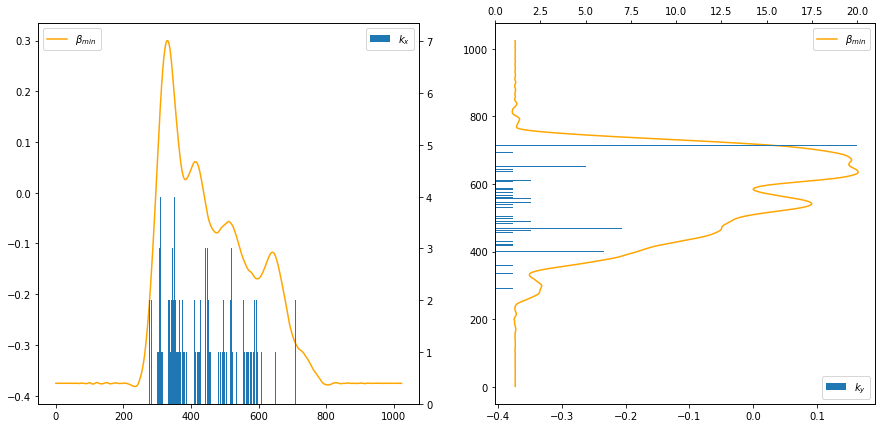

In [54]:
power_spectrum_beta = lambda q: 1e0/((q/1e1)**4+1)
power_spectrum_f = lambda q: 1e0/((q/1e1)**4 + 1)

minimizer = nifty5.VL_BFGS(controller=nifty5.GradientNormController(
    iteration_limit=2000, name=None))
bcm = bayesian_causal_model.cause_model_shallow.CausalModelCauseShallow(
    N_pix=1024,
    power_spectrum_beta=power_spectrum_beta,
    power_spectrum_f=power_spectrum_f,
    minimizer=minimizer,
    rho = 1e-0,
    noise_var=1e-1,
)

beta_init = nifty5.Field.from_global_data(domain=bcm.s_space, arr=np.zeros(1024))

bcm.set_data(x, y)
evidence = bcm.get_evidence(direction=1, return_terms=1, beta_init=beta_init)
print('Evidence Hamiltonian for direction X->Y: ', evidence[0])
print('Contribution of terms:')
print(('{:<30}: {:.2f}\n'*7).format(*[t for term in evidence[1] for t in term ]))
emin_cause_direction_1 = bcm.energy_cause_min.position.to_global_data()

evidence = bcm.get_evidence(direction=-1, return_terms=1, beta_init=beta_init)
print('Evidence Hamiltonian for direction Y->X:', evidence[0])
print(('{:<30}: {:.2f}\n'*7).format(*[t for term in evidence[1] for t in term ]))
emin_cause_direction_0 = bcm.energy_cause_min.position.to_global_data()

fig = plt.figure(figsize=(15,7))
ax1, ax2  = fig.subplots(1, 2)
ax1_ = ax1.twinx()
ax1.ticklabel_format(axis='both', style='sci')
ax1.plot(emin_cause_direction_1, label=r'$\beta_{min}$', c='orange')
ax1_.bar(np.arange(bcm.N_pix), bcm.k_x, label=r'$k_x$')
ax1.legend(loc=2)
ax1_.legend(loc=0)

ax2.plot(emin_cause_direction_0, np.arange(bcm.N_pix, 0, -1), c='orange', label=r'$\beta_{min}$')
ax2_ = ax2.twiny()
ax2_.barh(np.arange(bcm.N_pix, 0, -1), bcm.k_y, label=r'$k_y$')
ax2.legend(loc=0)
ax2_.legend(loc=4)

bcm.

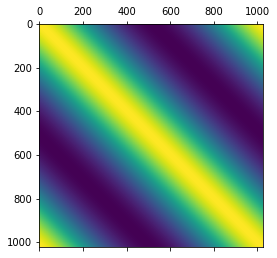

In [247]:
DFT = scipy.linalg.dft(1024, scale='sqrtn')
DHT = (np.real(DFT) + np.imag(DFT))
B_h = np.diag([(lambda k: 1e3/(k**4 + 1))(q) for q in (list(range(512)) + list(range(512, 0, -1)))])
plt.matshow((DHT.T@B_h@DHT))

k = bcm.k_x
B = DHT.T@B_h@DHT
B_inv = DHT.T@scipy.linalg.inv(B_h)@DHT
B_inv_ = scipy.linalg.inv(B)


In [226]:
import scipy.optimize
rho = 1

def energy(beta):
    term1 = -beta@k
    term2 = rho*np.sum(np.exp(beta))
    term3 = 0.5*beta@B_inv@beta
    return term1+term2+term3

def jac(beta):
    term1 = -k
    term2 = rho*np.exp(beta)
    term3 = B_inv@beta
    return term1 + term2 + term3
def hess(beta):
    term1 = B_inv
    term2 = rho*np.diag(np.exp(beta))
    return term1+term2



In [223]:
#scipy.optimize.check_grad(energy, jac, x0 = np.zeros(1024))
#plt.plot(scipy.optimize.approx_fprime(np.zeros(1024), energy, epsilon=1))
#plt.plot(jac(np.zeros(1024)))
B_inv[50, 0:80]

array([ 1.12254670e+07, -1.16845720e+07,  1.21726601e+07, -1.26922231e+07,
        1.32460260e+07, -1.38371444e+07,  1.44690072e+07, -1.51454461e+07,
        1.58707542e+07, -1.66497541e+07,  1.74878781e+07, -1.83912633e+07,
        1.93668642e+07, -2.04225867e+07,  2.15674487e+07, -2.28117737e+07,
        2.41674233e+07, -2.56480816e+07,  2.72696011e+07, -2.90504287e+07,
        3.10121321e+07, -3.31800555e+07,  3.55841415e+07, -3.82599697e+07,
        4.12500792e+07, -4.46056678e+07,  4.83887959e+07, -5.26752728e+07,
        5.75584791e+07, -6.31544875e+07,  6.96090134e+07, -7.71069799e+07,
        8.58858841e+07, -9.62547953e+07,  1.08621864e+08, -1.23534994e+08,
        1.41743385e+08, -1.64293145e+08,  1.92680294e+08, -2.29104148e+08,
        2.76903812e+08, -3.41345739e+08,  4.31124932e+08, -5.61422433e+08,
        7.60660710e+08, -1.08703542e+09,  1.67463398e+09, -2.88560891e+09,
        5.90461671e+09, -1.09196920e+10,  1.37439827e+10, -1.09196920e+10,
        5.90461671e+09, -

In [252]:
res = scipy.optimize.minimize(fun=energy, method='trust-ncg', x0=np.log(k+1e-3), jac=jac, hess=hess)
print(res)

     fun: 375.4537622168339
    hess: array([[ 13743983.99713342, -10919691.9808077 ,   5904616.71104714, ...,
         -2885608.91005101,   5904616.71104797, -10919691.98080947],
       [-10919691.9808077 ,  13743984.03426295, -10919691.9808077 , ...,
          1674633.97740848,  -2885608.91005248,   5904616.71104917],
       [  5904616.71104714, -10919691.9808077 ,  13743984.07124417, ...,
         -1087035.42049909,   1674633.97740973,  -2885608.91005245],
       ...,
       [ -2885608.91005101,   1674633.97740848,  -1087035.42049909, ...,
         13743983.88605375, -10919691.98080851,   5904616.71104818],
       [  5904616.71104797,  -2885608.91005248,   1674633.97740973, ...,
        -10919691.98080851,  13743983.92291554, -10919691.98080937],
       [-10919691.98080947,   5904616.71104917,  -2885608.91005245, ...,
          5904616.71104818, -10919691.98080937,  13743983.95998065]])
     jac: array([ 6.80166972e-08,  5.08870931e-07, -1.29843354e-07, ...,
        1.07196545e-08, 

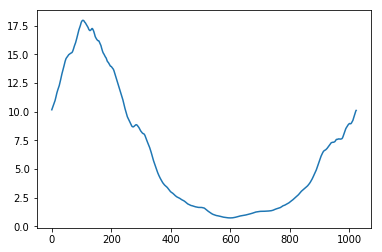

In [238]:
plt.plot(np.exp(np.random.multivariate_normal(mean=np.zeros(1024), cov=B*1000)))

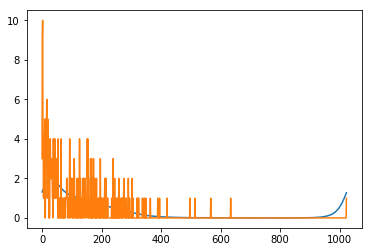

In [251]:
plt.plot(np.exp(res.x))
plt.plot(k)

1


/afs/mpa/home/maxk/source/NIFTy/.eggs/scipy-1.1.0-py3.6-linux-x86_64.egg/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


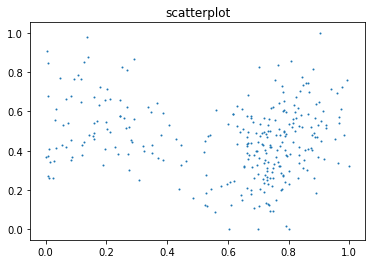

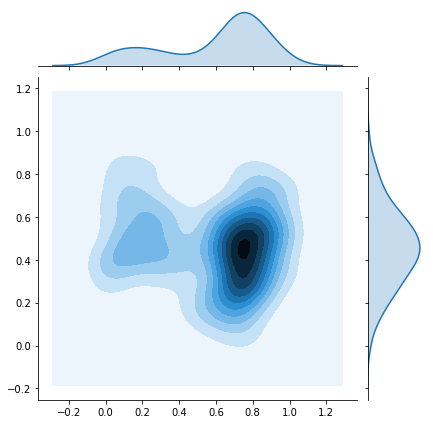

In [110]:
(x, y), direction = get_pair(10, 'bcs_nvar5e-1')
print(direction)
scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
x, y = scaler.fit_transform(np.array((x, y)).T).T
fig, ax= plt.subplots(1)
ax.scatter(x, y, s=1)
ax.set_title('scatterplot')
plot = sns.jointplot(x, y, kind="kde")

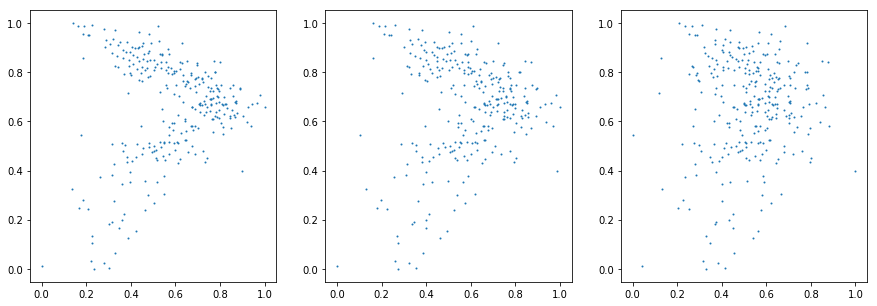

In [279]:
(x1, y1), direction = get_pair(15, 'bcs_nvar5e-2')
(x2, y2), direction = get_pair(15, 'bcs_nvar1e-1')
(x3, y3), direction = get_pair(15, 'bcs_nvar5e-1')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(x1, y1, s=1)
ax2.scatter(x2, y2, s=1)
ax3.scatter(x3, y3, s=1)

Evidence Hamiltonian for direction X->Y:  2682.5198014332345
Contribution of terms:
ln(prod(k_j!))                : 30.50
1/2 ln(det(curvature_gamma_beta)): 2644.14
-k^dagger.beta_0              : 16.54
rho(One.e^beta_0)             : 285.32
1/2 beta_0.(B^-1).beta_0      : 1.70
1/2 y.((F_tilde + N)^-1).y    : 88.45
1/2 ln(det(F_tilde + N))      : -384.13

Evidence Hamiltonian for direction Y->X: 2695.803334350419
ln(prod(k_j!))                : 13.69
1/2 ln(det(curvature_gamma_beta)): 2645.96
-k^dagger.beta_0              : 97.99
rho(One.e^beta_0)             : 285.20
1/2 beta_0.(B^-1).beta_0      : 1.71
1/2 y.((F_tilde + N)^-1).y    : 31.03
1/2 ln(det(F_tilde + N))      : -379.77

Optimization terminated successfully.


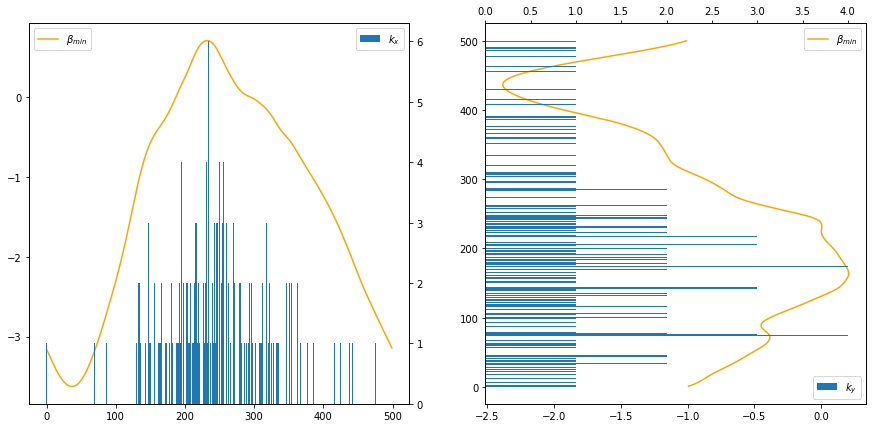

In [75]:
scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
x, y = scaler.fit_transform(np.array((x, y)).T).T

power_spectrum_beta = lambda q: 1e6/((q/1e0)**4+1)
power_spectrum_f = lambda q: 1e6/((q/1e0)**4 + 1)

#minimizer = nifty5.VL_BFGS(controller=nifty5.GradientNormController(
#    iteration_limit=2000, name=None))
#minimizer = nifty5.L_BFGS_B(ftol=1e-10, gtol=1e-15, maxiter=10000)
bcm = bayesian_causal_model.cause_model_shallow_numpy.CausalModelShallow(
    N_pix=500,
    power_spectrum_beta=power_spectrum_beta,
    power_spectrum_f=power_spectrum_f,
    rho = 1,
    noise_var=5e-2,
)
method = 'Newton-CG'

bcm.set_data(x, y, no_duplicates=False)
evidence = bcm.get_evidence(direction=1, return_terms=1, method=method)
print('Evidence Hamiltonian for direction X->Y: ', evidence[0])
print('Contribution of terms:')
print(('{:<30}: {:.2f}\n'*7).format(*[t for term in evidence[1] for t in term ]))
beta0_x_to_y = bcm.minimization_result.x
print(bcm.minimization_result.message)

evidence = bcm.get_evidence(direction=-1, return_terms=1,  method=method)
print('Evidence Hamiltonian for direction Y->X:', evidence[0])
print(('{:<30}: {:.2f}\n'*7).format(*[t for term in evidence[1] for t in term ]))
beta0_y_to_x = bcm.minimization_result.x
print(bcm.minimization_result.message)

fig = plt.figure(figsize=(15,7))
ax1, ax2  = fig.subplots(1, 2)
ax1_ = ax1.twinx()
ax1.ticklabel_format(axis='both', style='sci')
ax1.plot(beta0_x_to_y, label=r'$\beta_{min}$', c='orange')
ax1_.bar(np.arange(bcm.N_pix), bcm.k_x, label=r'$k_x$')
ax1.legend(loc=2)
ax1_.legend(loc=0)

ax2.plot(beta0_y_to_x, np.arange(bcm.N_pix, 0, -1), c='orange', label=r'$\beta_{min}$')
ax2_ = ax2.twiny()
ax2_.barh(np.arange(bcm.N_pix, 0, -1), bcm.k_y, label=r'$k_y$')
ax2.legend(loc=0)
ax2_.legend(loc=4)

In [ ]:
%pdb 0
def callback(x):
    print('test')
res = scipy.optimize.minimize(
    fun=energy, 
    x0 =np.log(0.05)*np.ones(500), 
    args=(bcm.x_indices, bcm.F_tilde, bcm.y, 1, matrix),
    method='Newton-CG',
    jac=gradient_eta,
    hess=curvature_eta,
    callback=callback,)
plt.plot(res.x)
print(res.x)

Automatic pdb calling has been turned OFF
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test


In [57]:
print(energy(np.linspace(1, 1, 500)*(-1), *args, term=1))

-37.88067939922776


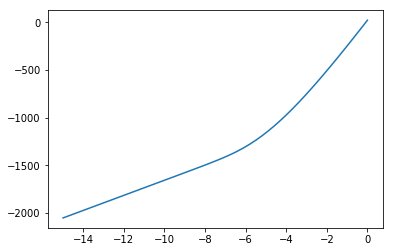

In [76]:
args = (bcm.x_indices, bcm.F_tilde, bcm.y, 1e-1, matrix)
plt.plot(np.linspace(0, -15, 50), [energy(np.linspace(1, 1, 500)*n, *args, term=1) for n in np.linspace(0, -30, 50)])
#energy(np.ones(500)*(-10), *args)

In [74]:
bcm.F_tilde.shape

(285, 285)

In [71]:
def energy(eta, x_indices, F_tilde, y, sigma_eta, diff_matrix, term=None):
    noise_covariance = np.diag(np.exp(eta[x_indices]))
    sign, log_det = np.linalg.slogdet((1/(1))*np.eye(len(x_indices))@(F_tilde + noise_covariance))
    term1 = 0.5* log_det
    G = np.linalg.inv(F_tilde + noise_covariance)
    term2 = 0.5*y@G@y
    term3 = (1/(2*sigma_eta))*np.gradient(eta)@np.gradient(eta)
    if term == 1:
        return term1
    if term == 2:
        return term2
    if term == 3:
        return term3
    else:
        return term1 + term2 + term3



In [12]:
def gradient_eta(eta, x_indices, F_tilde, y, sigma_eta, diff_matrix):
    exp_eta_x = np.exp(eta[x_indices])
    noise_covariance = np.diag(exp_eta_x)
    G = np.linalg.inv(F_tilde + noise_covariance)
    #tr(G.diag(exp(eta(x))delta_x))
    term1 = 0.5*np.array([
        np.trace(G@np.diag(np.where(
            np.equal(x_indices, i), exp_eta_x, np.zeros(len(y)))))
        for i in range(len(eta))])
    term2 = -0.5*np.array([y@G@np.diag(np.where(
            np.equal(x_indices, i), exp_eta_x, np.zeros(len(y)))
                                      )@G@y
                           for i in range(len(eta))])
    term3 = (1/sigma_eta)*diff_matrix@eta
    return term1 + term2 + term3

In [13]:
def curvature_eta(eta, x_indices, F_tilde, y, sigma_eta, diff_matrix):
    exp_eta_x = np.exp(eta[x_indices])
    del_exp_eta_list = [np.diag(np.where(
            np.equal(x_indices, i), exp_eta_x, np.zeros(len(y))))
                        for i in range(len(eta))]
    noise_covariance = np.diag(exp_eta_x)
    G = np.linalg.inv(F_tilde + noise_covariance)
    #tr(G.diag(exp(eta(x))delta_x))
    term1 = np.array([[np.trace(-G@del_exp_eta_list[i]@G@del_exp_eta_list[j] + 
                      (G@del_exp_eta_list[i] if i == j else 0) )
                       for i in range(len(eta))]
                      for j in range(len(eta))])
    term2 = np.array([[
                y@(2*G@del_exp_eta_list[i]@G@del_exp_eta_list[j]@G
                    - (G@del_exp_eta_list[i]@G if i==j else 0))@y
                    for i in range(len(eta))]
                    for j in range(len(eta))])
    term3 = (1/sigma_eta)*diff_matrix
    return term1 + term2 + term3
    

In [40]:
N =500
matrix = np.zeros((N, N))
for i in range(N):
    left = np.zeros(N)
    left[i] = 1
    for j in range(N):
        right = np.zeros(N)
        right[j] = 1
        matrix[i, j] = np.gradient(left)@np.gradient(right)
        

In [116]:
np.var(y[np.all([x >= 0.6, x <= 0.8], axis=0)])

0.029416087863346388

In [111]:
np.argmax([np.sum(np.all([x >= 0.01*i, x <= 0.01*(i+5)], axis=0)) for i in range(95)])

71

In [10]:
import scipy.optimize

In [109]:
np.random.normal(loc=0, scale=0.1, size=1000).var()

0.01011525069049416

In [128]:
np.linalg.slogdet(bcm.F_tilde + 0.005*np.diag(np.ones(len(bcm.x))))

(1.0, -1338.1063778216183)